In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# nums = [0,1,1]
# a = 9
# for num in nums:
#     a=a^num
# print(a)

In [14]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'class': np.random.choice(['A', 'B'], 100),
                   'value':np.random.random_sample(100)})
df

,class,value
0,B,0.789563
1,A,0.384859
2,B,0.149105
3,B,0.958067
4,B,0.398135
...,...,...
95,A,0.755478
96,B,0.630045
97,B,0.508178
98,B,0.011115


In [15]:
df['dataset'] = pd.DataFrame(df.groupby('class').apply(lambda x: pd.cut(x['value'], 10, labels=range(0, 10)))).reset_index(0, drop=True)

In [16]:
df.groupby('class')

In [46]:
# 创建一个df
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(['Ohio', 'Colorado']),
                    columns=pd.Index(['one', 'two', 'three']))
print(data)
data = data.groupby(["one", "two","three"]).size()
# a=data.stack()
# a
print(data)
data.unstack()

          one  two  three
Ohio        0    1      2
Colorado    3    4      5
one  two  three
0    1    2        1
3    4    5        1
dtype: int64


,three,2,5
one,two,,
0,1,1.0,NaN
3,4,NaN,1.0


<AxesSubplot:xlabel='two,three'>

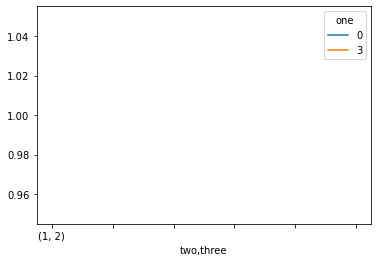

In [47]:
data.unstack(0).plot()

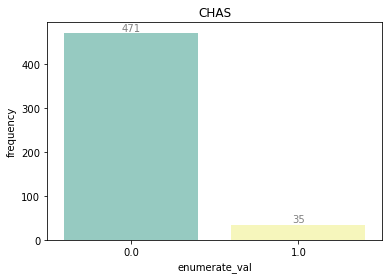

In [1]:
# load Boston dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)

# Missing Percentage + Variance
stat_df = pd.DataFrame({'# of miss':df.isnull().sum(),
                        '% of miss':df.isnull().sum() / len(df) * 100,
                        'var':df.var()})

# Frequency
cat_name = 'CHAS'
chas = df[cat_name].value_counts().sort_index()
cat_df = pd.DataFrame({'enumerate_val':list(chas.index), 'frequency':list(chas.values)})
sns.barplot(x = "enumerate_val", y = "frequency",data = cat_df, palette="Set3")
for x, y in zip(range(len(cat_df)), cat_df.frequency):
    plt.text(x, y, '%d'%y, ha='center', va='bottom', color='grey')
plt.title(cat_name)
plt.show()

In [29]:
df = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
# a.max()
df = pd.DataFrame(df)
print(df.loc[0])
# c_min = df[col].min()
# c_max = df[col].max()
# if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
#     df[col] = df[col].astype(np.int8)

state    Ohio
year     2000
pop       1.5
Name: 0, dtype: object


In [4]:
"""
embedded 选择特征：
"""
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

iris = load_iris()

# 将待L1惩罚项的逻辑回归作为基模型的特征选择
selected_data_lr = SelectFromModel(LogisticRegression(penalty='l1', C = 0.1, solver = 'liblinear'), max_features = 3).fit_transform(iris.data, iris.target)

# 将GBDT作为基模型的特征选择
selected_data_gbdt = SelectFromModel(GradientBoostingClassifier(), max_features = 3).fit_transform(iris.data, iris.target)

print(iris.data.shape)
print(selected_data_lr.shape)
print(selected_data_gbdt.shape)


(150, 4)
(150, 3)
(150, 2)


In [6]:
a = pd.DataFrame(iris.data)
b = pd.DataFrame(np.array(selected_data_lr.data))
c = pd.DataFrame(np.array(selected_data_gbdt.data))


print(a.head())
print(b.head())
print(c.head())

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
     0    1    2
0  5.1  3.5  1.4
1  4.9  3.0  1.4
2  4.7  3.2  1.3
3  4.6  3.1  1.5
4  5.0  3.6  1.4
     0    1
0  1.4  0.2
1  1.4  0.2
2  1.3  0.2
3  1.5  0.2
4  1.4  0.2


(150, 3)